In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age',                          # Age
    'sex',                          # Sex (1 = male, 0 = female)
    'chest_pain_type',              # Type of chest pain (4 types)
    'resting_blood_pressure',       # Resting blood pressure (mm Hg)
    'serum_cholesterol',            # Serum cholesterol (mg/dl)
    'fasting_blood_sugar',          # Fasting blood sugar (> 120 mg/dl, 1 = true, 0 = false)
    'resting_ecg',                  # Resting electrocardiogram results (0, 1, 2)
    'max_heart_rate',               # Maximum heart rate achieved
    'exercise_induced_angina',      # Exercise-induced angina (1 = yes, 0 = no)
    'st_depression',                # ST depression induced by exercise relative to rest
    'slope_of_st_segment',          # Slope of the peak exercise ST segment
    'num_major_vessels',            # Number of major vessels (0-3) colored by fluoroscopy
    'thalassemia',                  # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)
    'heart_disease',                # Diagnosis of heart disease (angiographic disease status)
]
df = pd.read_csv(url, names=column_names)
df

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope_of_st_segment,num_major_vessels,thalassemia,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
# Preprocessing: Replace '?' with NaN and drop missing values for simplicity
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)


In [ ]:
# Convert categorical features to numeric
df['chest_pain_type'] = pd.to_numeric(df['chest_pain_type'])
df['thalassemia'] = pd.to_numeric(df['thalassemia'])
print(df['chest_pain_type'])
print(df['thalassemia'])

0      1.0
1      4.0
2      4.0
3      3.0
4      2.0
      ... 
297    4.0
298    1.0
299    4.0
300    4.0
301    2.0
Name: chest_pain_type, Length: 297, dtype: float64
0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
297    7.0
298    7.0
299    7.0
300    7.0
301    3.0
Name: thalassemia, Length: 297, dtype: float64


In [ ]:
# Convert target to binary classification (0: No Disease, 1: Disease)
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x > 0 else 0)
df

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,slope_of_st_segment,num_major_vessels,thalassemia,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [ ]:
# Features and Target
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']
print(X)
print(y)

      age  sex  chest_pain_type  resting_blood_pressure  serum_cholesterol  \
0    63.0  1.0              1.0                   145.0              233.0   
1    67.0  1.0              4.0                   160.0              286.0   
2    67.0  1.0              4.0                   120.0              229.0   
3    37.0  1.0              3.0                   130.0              250.0   
4    41.0  0.0              2.0                   130.0              204.0   
..    ...  ...              ...                     ...                ...   
297  57.0  0.0              4.0                   140.0              241.0   
298  45.0  1.0              1.0                   110.0              264.0   
299  68.0  1.0              4.0                   144.0              193.0   
300  57.0  1.0              4.0                   130.0              131.0   
301  57.0  0.0              2.0                   130.0              236.0   

     fasting_blood_sugar  resting_ecg  max_heart_rate  \
0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Fit the scaler and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the already fitted scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
#Logistic Regression Model
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Print the predictions
print("Predicted values:", y_pred)


Predicted values: [0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1]


In [ ]:
#Performance Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



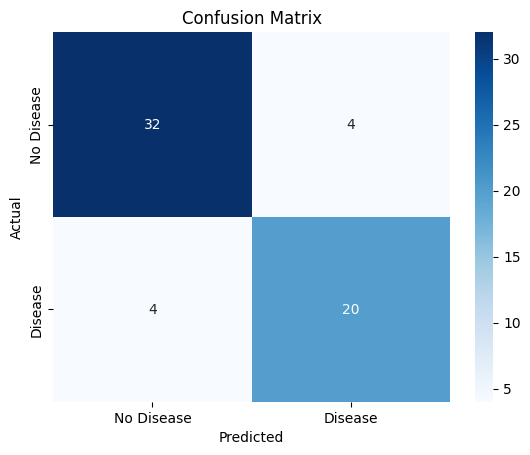

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])

# Label the axes and add a title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
#A heatmap confusion matrix that helps you understand how well the model performs. For example:
#True Positives (TP): Number of cases predicted as Disease and were actually Disease.
#True Negatives (TN): Number of cases predicted as No Disease and were actually No Disease.
#False Positives (FP): Number of cases predicted as Disease but were actually No Disease.
#False Negatives (FN): Number of cases predicted as No Disease but were actually Disease.
#Suppose we have a binary classification model for disease prediction:
#TP (True Positive): 22 (correctly predicted disease cases)
#TN (True Negative): 31 (correctly predicted non-disease cases)
#FP (False Positive): 4 (incorrectly predicted disease cases)
#FN (False Negative): 4 (incorrectly predicted non-disease cases)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Assuming the dataset is already loaded and the model is trained
# Pre-trained Logistic Regression model and scaler should be available

# Function to collect user input dynamically and predict heart disease
def predict_heart_disease():
    """
    Predicts heart disease based on user input.
    """
    # Collect user input
    print("Please enter the following information:")

    age = int(input("Age (in years): "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    chest_pain_type = int(input("Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic): "))
    resting_blood_pressure = int(input("Resting blood pressure (in mm Hg): "))
    serum_cholesterol = int(input("Serum cholesterol (in mg/dl): "))
    fasting_blood_sugar = int(input("Fasting blood sugar > 120 mg/dl (1 = True, 0 = False): "))
    resting_ecg = int(input("Resting electrocardiographic results (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy): "))
    max_heart_rate = int(input("Maximum heart rate achieved (in bpm): "))  # changed variable name
    exercise_induced_angina = int(input("Exercise induced angina (1 = Yes, 0 = No): "))
    st_depression = float(input("ST depression induced by exercise relative to rest: "))
    slope_of_st_segment = int(input("The slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping): "))  # changed variable name
    num_major_vessels = int(input("Number of major vessels (0-3): "))  # changed variable name
    thalassemia = int(input("Thalassemia (1 = Normal, 2 = Fixed defect, 3 = Reversible defect): "))

    # Organize the input data into a dictionary with correct column names used during training
    user_info = {
        'age': age,
        'sex': sex,
        'chest_pain_type': chest_pain_type,
        'resting_blood_pressure': resting_blood_pressure,
        'serum_cholesterol': serum_cholesterol,
        'fasting_blood_sugar': fasting_blood_sugar,
        'resting_ecg': resting_ecg,
        'max_heart_rate': max_heart_rate,  # matching with the training feature name
        'exercise_induced_angina': exercise_induced_angina,
        'st_depression': st_depression,
        'slope_of_st_segment': slope_of_st_segment,  # matching with the training feature name
        'num_major_vessels': num_major_vessels,  # matching with the training feature name
        'thalassemia': thalassemia
    }

    # Convert the input into a DataFrame
    user_data = pd.DataFrame([user_info])

    # Feature scaling (using the pre-trained scaler)
    user_data_scaled = scaler.transform(user_data)

    # Prediction (using the pre-trained logistic regression model)
    prediction = log_reg.predict(user_data_scaled)

    # Output the result
    if prediction[0] == 1:
        print("The person is at risk of heart disease.")
    else:
        print("The person is not at risk of heart disease.")

    return prediction[0]

# Example of calling the function to predict heart disease based on user input
predict_heart_disease()


Please enter the following information:
Age (in years): 54
Sex (1 = Male, 0 = Female): 1
Chest pain type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic): 3
Resting blood pressure (in mm Hg): 123
Serum cholesterol (in mg/dl): 124
Fasting blood sugar > 120 mg/dl (1 = True, 0 = False): 1
Resting electrocardiographic results (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy): 2
Maximum heart rate achieved (in bpm): 120
Exercise induced angina (1 = Yes, 0 = No): 1
ST depression induced by exercise relative to rest: 12
The slope of the peak exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping): 2
Number of major vessels (0-3): 3
Thalassemia (1 = Normal, 2 = Fixed defect, 3 = Reversible defect): 3
The person is at risk of heart disease.


1